# 動作の骨格座標プロット作成と分類モデル ver.3

ver.2からの変更点
- サンプル数を減らした
- ver.2 は線形補間しすぎてサンプル数が多くなりすぎていた

プログラムの概要
- 7サンプルでプロットしてみた

- 参考：

    - https://datawokagaku.com/logstic_reg_python/

    - https://datawokagaku.com/confusion_matrix/



## Data Processing 

In [1]:
# -*- coding: utf-8 -*-

import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#CSVファイル読み込み。
df = pd.read_csv('C:/miyoshilab/arm/movie/2023-01-20/bi2cm1/bi2cm1.csv', sep=",")
df_51 = pd.read_csv('C:/miyoshilab/arm/movie/2023-01-20/bi5cm1/bi5cm1.csv', sep=",")
df_52 = pd.read_csv('C:/miyoshilab/arm/movie/2023-01-20/bi5cm2/bi5cm2.csv', sep=",") 

# human カラムを落とす
df.drop('human', axis=1, inplace=True)
df_51.drop('human', axis=1, inplace=True)
df_52.drop('human', axis=1, inplace=True)
# display(df_52)
# print(df)

Text(0, 0.5, 'Cutting Hand X')

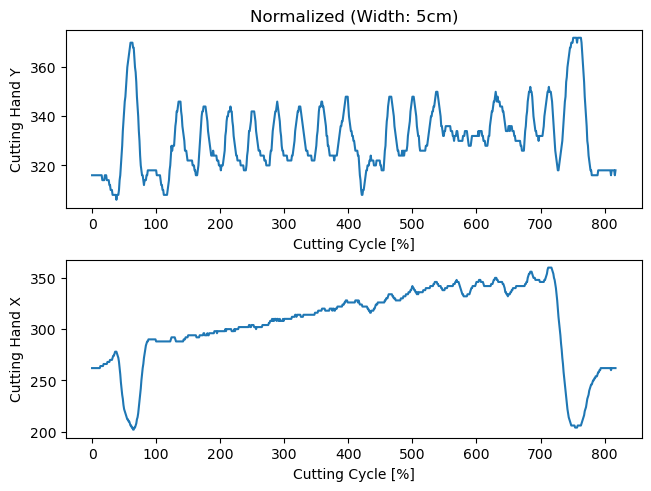

In [2]:
# 2cm
# Axis 1
fig, axs2 = plt.subplots(2,1, layout='constrained')
lines11 = axs2[0].plot(df.flame, df.pos_04y, label='sample 01')
axs2[0].set_xlabel('Cutting Cycle [%]')
axs2[0].set_ylabel('Cutting Hand Y')
axs2[0].set_title('Normalized (Width: 5cm)')
# axs2[0].legend(loc='lower right')

# Axis 2
lines21 = axs2[1].plot(df.flame, df.pos_04x, label='sample 01')
axs2[1].set_xlabel('Cutting Cycle [%]')
axs2[1].set_ylabel('Cutting Hand X')
# axs2[1].legend()

Text(0, 0.5, 'Cutting Hand X')

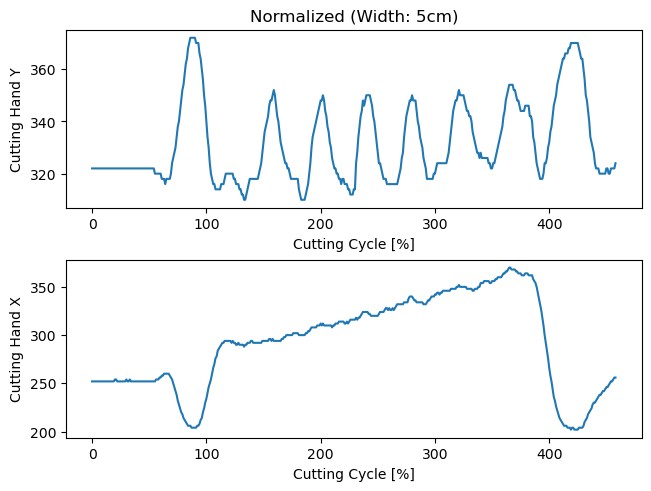

In [3]:
# 5cm
# Axis 1
fig, axs = plt.subplots(2,1, layout='constrained')
lines11 = axs[0].plot(df_51.flame, df_51.pos_04y, label='sample 01')
axs[0].set_xlabel('Cutting Cycle [%]')
axs[0].set_ylabel('Cutting Hand Y')
axs[0].set_title('Normalized (Width: 5cm)')
# axs[0].legend(loc='lower right')

# Axis 2
lines21 = axs[1].plot(df_51.flame, df_51.pos_04x, label='sample 01')
axs[1].set_xlabel('Cutting Cycle [%]')
axs[1].set_ylabel('Cutting Hand X')
# axs[1].legend()

In [4]:
# データを線形補間してサンプル数を増やす --------------------------------
row_4 = (df.flame.size - 1) * 4
row_51 = (df_51.flame.size - 1) * 4
row_52 = (df_52.flame.size - 1) * 4

# flame_4 = []
# for i in range(row_4): 
#     flame_4.append(i / 4.0)
# flame_51 = []
# for i in range(row_51): 
#     flame_51.append(i / 4.0)
# flame_52 = []
# for i in range(row_52): 
#     flame_52.append(i / 4.0)
    
# # print(flame_4)
# df_flame = pd.DataFrame({'flame': flame_4})
# df_flame51 = pd.DataFrame({'flame': flame_51})
# df_flame52 = pd.DataFrame({'flame': flame_52})

# print(df_flame)

# df_merged = pd.merge(df, df_flame, on='flame', how='right')
# df_merged51 = pd.merge(df_51, df_flame51, on='flame', how='right')
# df_merged52 = pd.merge(df_52, df_flame52, on='flame', how='right')
# display(df_merged52)

# df_fill = df_merged.interpolate()
# df_fill51 = df_merged51.interpolate()
# df_fill52 = df_merged52.interpolate()
# print(df_fill)
# display(df_fill52)

df_fill = df.copy()
df_fill51 = df_51.copy()
df_fill52 = df_52.copy()

In [5]:
# 1周期ごとのサンプルとして作成 ----------------------------------------

# 2cm1
m01 = df_fill.query('137 <= flame < 177')
# print(m01)
m02 = df_fill.query('177 <= flame < 216')
m03 = df_fill.query('216 <= flame < 253')
m04 = df_fill.query('253 <= flame < 290')
m05 = df_fill.query('290 <= flame < 325')
m06 = df_fill.query('325 <= flame < 360')
m07 = df_fill.query('360 <= flame < 397')
m08 = df_fill.query('466 <= flame < 501')
m09 = df_fill.query('501 <= flame < 538')
m10 = df_fill.query('631 <= flame < 684')
m11 = df_fill.query('684 <= flame < 713')

# 5cm1
m5_01 = df_fill51.query('158 <= flame < 201')
m5_02 = df_fill51.query('201 <= flame < 241')
m5_03 = df_fill51.query('241 <= flame < 280')
m5_04 = df_fill51.query('280 <= flame < 321')
m5_05 = df_fill51.query('321 <= flame < 381')

m5_06 = df_fill52.query('155 <= flame < 195')
m5_07 = df_fill52.query('195 <= flame < 233')
m5_08 = df_fill52.query('233 <= flame < 290')

print('[SIZE] ')
print('m01: ', m01.flame.size)
print('m02: ', m02.flame.size)
print('m03: ', m03.flame.size)
print('m04: ', m04.flame.size)
print('m05: ', m05.flame.size)
print('m06: ', m06.flame.size)
print('m07: ', m07.flame.size)
# print('m08: ', m08.flame.size)
# print('m09: ', m09.flame.size)
# print('m10: ', m10.flame.size)
# print('m11: ', m11.flame.size)

# print('\nm5_01: %d \nm5_02 : %d \nm5_03: %d \nm5_04: %d \nm5_05: %d \nm5_06: %d \nm5_07: %d \nm5_08: %d' 
#       % (m5_01['flame'].size, m5_02['flame'].size, m5_03['flame'].size, m5_04['flame'].size, 
#          m5_05['flame'].size, m5_06['flame'].size, m5_07['flame'].size, m5_08['flame'].size))

print('m5_01: ', m5_01.flame.size)
print('m5_02: ', m5_02.flame.size)
print('m5_03: ', m5_03.flame.size)
print('m5_04: ', m5_04.flame.size)
# print('m5_05: ', m5_05.flame.size)
print('m5_06: ', m5_06.flame.size)
print('m5_07: ', m5_07.flame.size)
print('m5_08: ', m5_08.flame.size)

[SIZE] 
m01:  40
m02:  39
m03:  37
m04:  37
m05:  35
m06:  35
m07:  37
m5_01:  43
m5_02:  40
m5_03:  39
m5_04:  41
m5_06:  40
m5_07:  38
m5_08:  57


In [33]:
# 作業時間の平均　--------------------------------------
import statistics
import math

fps = 30.0
# print(1/fps)

df_time = pd.DataFrame({'twenty': [m01['flame'].size, m02['flame'].size, m03['flame'].size, m04['flame'].size, 
                              m05['flame'].size, m06['flame'].size, m07['flame'].size],
                   'fifty': [m5_01['flame'].size, m5_02['flame'].size, m5_03['flame'].size, m5_04['flame'].size, 
                             m5_06['flame'].size, m5_07['flame'].size, m5_08['flame'].size]})

df_time /= fps

print(df_time)

mean_20mm = df_time['twenty'].mean
mean_50mm = df_time['fifty'].mean
print(mean_20mm, mean_50mm)

# fig, ax = plt.subplots()

fruits = ['20mm', '50mm']
counts = []
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

fig, ax5_4 = plt.subplots(2, 1, layout='constrained')
line5_41 = ax5_4[0].plot(m5_01new['flame'], mean5_cyr, label='Cutting Hand Y')
fill5_41 = ax5_4[0].fill_between(m5_01new['flame'], mean5_cyr + std5_cyr, mean5_cyr - std5_cyr, alpha=0.2)
ax5_4[0].set_xlabel('Cutting Cycle [%]')
ax5_4[0].set_ylabel('Y Displacement [px]')
ax5_4[0].set_title('Cutting Hand Y - Cutting Hand X')
ax5_4[0].legend(loc='lower right')

# # 20mm
# time20 = [m01['flame'].size, m02['flame'].size, m03['flame'].size, m04['flame'].size, 
#           m05['flame'].size, m06['flame'].size, m07['flame'].size]
# for i in time20:
#     i = float(i) / fps
# print(time20)

# 50mm

     twenty     fifty
0  1.333333  1.433333
1  1.300000  1.333333
2  1.233333  1.300000
3  1.233333  1.366667
4  1.166667  1.333333
5  1.166667  1.266667
6  1.233333  1.900000
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0    1.333333
1    1.300000
2    1.233333
3    1.233333
4    1.166667
5    1.166667
6    1.233333
Name: twenty, dtype: float64> <bound method NDFrame._add_numeric_operations.<locals>.mean of 0    1.433333
1    1.333333
2    1.300000
3    1.366667
4    1.333333
5    1.266667
6    1.900000
Name: fifty, dtype: float64>


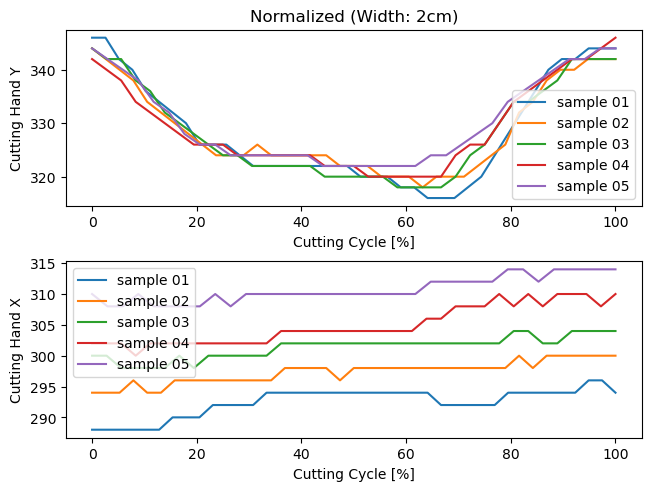

In [7]:
# カット動作1周期の正規化を作成 -----------------------------
from sklearn import preprocessing

# fig, ax = plt.subplots()  # a figure with a single Axes
# line1 = ax.plot(m01['flame'], m01['pos_07x'], label='Before')

# l_2d_min_max = .fit_transform(m01_nm.flame) #これは二次元配列に対する処理 ---------
m01_nm = m01.copy()
m02_nm = m02.copy()
m03_nm = m03.copy()
m04_nm = m04.copy()
m05_nm = m05.copy()
m06_nm = m06.copy()
m07_nm = m07.copy()
m08_nm = m08.copy()
m09_nm = m09.copy()
m10_nm = m10.copy()
m11_nm = m11.copy()

m5_01nm = m5_01.copy()
m5_02nm = m5_02.copy()
m5_03nm = m5_03.copy()
m5_04nm = m5_04.copy()
m5_05nm = m5_05.copy()
m5_06nm = m5_06.copy()
m5_07nm = m5_07.copy()
m5_08nm = m5_08.copy()

# 一次元配列に対する正規化 ----------------------------------------------------
m01_nm.flame = preprocessing.minmax_scale(m01_nm.flame) * 100
m02_nm.flame = preprocessing.minmax_scale(m02_nm.flame) * 100
m03_nm.flame = preprocessing.minmax_scale(m03_nm.flame) * 100
m04_nm.flame = preprocessing.minmax_scale(m04_nm.flame) * 100
m05_nm.flame = preprocessing.minmax_scale(m05_nm.flame) * 100
m06_nm.flame = preprocessing.minmax_scale(m06_nm.flame) * 100
m07_nm.flame = preprocessing.minmax_scale(m07_nm.flame) * 100
m08_nm.flame = preprocessing.minmax_scale(m08_nm.flame) * 100
m09_nm.flame = preprocessing.minmax_scale(m09_nm.flame) * 100
m10_nm.flame = preprocessing.minmax_scale(m10_nm.flame) * 100
m11_nm.flame = preprocessing.minmax_scale(m11_nm.flame) * 100

m5_01nm.flame = preprocessing.minmax_scale(m5_01nm.flame) * 100
m5_02nm.flame = preprocessing.minmax_scale(m5_02nm.flame) * 100
m5_03nm.flame = preprocessing.minmax_scale(m5_03nm.flame) * 100
m5_04nm.flame = preprocessing.minmax_scale(m5_04nm.flame) * 100
m5_05nm.flame = preprocessing.minmax_scale(m5_05nm.flame) * 100
m5_06nm.flame = preprocessing.minmax_scale(m5_06nm.flame) * 100
m5_07nm.flame = preprocessing.minmax_scale(m5_07nm.flame) * 100
m5_08nm.flame = preprocessing.minmax_scale(m5_08nm.flame) * 100

# Plot the results ------------------------------------------------
# 2cm
# Axis 1
fig, ax1 = plt.subplots(2,1, layout='constrained')
line11 = ax1[0].plot(m01_nm.flame, m01_nm.pos_04y, label='sample 01')
line12 = ax1[0].plot(m02_nm.flame, m02_nm.pos_04y, label='sample 02')
line13 = ax1[0].plot(m03_nm.flame, m03_nm.pos_04y, label='sample 03')
line14 = ax1[0].plot(m04_nm.flame, m04_nm.pos_04y, label='sample 04')
line15 = ax1[0].plot(m05_nm.flame, m05_nm.pos_04y, label='sample 05')
ax1[0].set_xlabel('Cutting Cycle [%]')
ax1[0].set_ylabel('Cutting Hand Y')
ax1[0].set_title('Normalized (Width: 2cm)')
ax1[0].legend(loc='lower right')

# Axis 2
line21 = ax1[1].plot(m01_nm.flame, m01_nm.pos_04x, label='sample 01')
line22 = ax1[1].plot(m02_nm.flame, m02_nm.pos_04x, label='sample 02')
line23 = ax1[1].plot(m03_nm.flame, m03_nm.pos_04x, label='sample 03')
line24 = ax1[1].plot(m04_nm.flame, m04_nm.pos_04x, label='sample 04')
line25 = ax1[1].plot(m05_nm.flame, m05_nm.pos_04x, label='sample 05')
ax1[1].set_xlabel('Cutting Cycle [%]')
ax1[1].set_ylabel('Cutting Hand X')
ax1[1].legend()

Text(0, 0.5, 'Cutting Hand X')

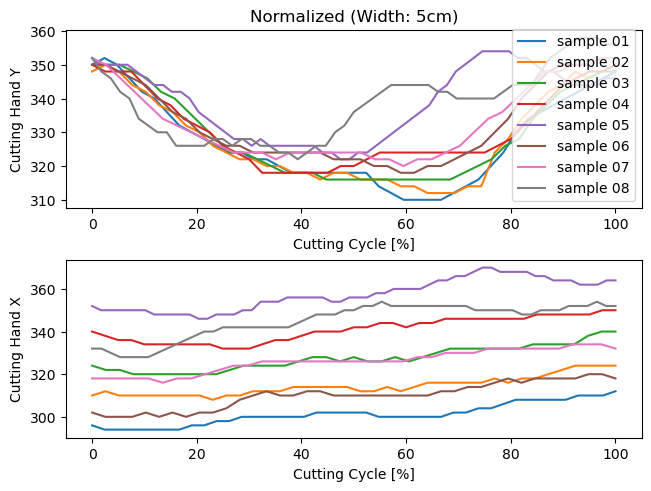

In [8]:
# 5cm
# Axis 1
fig, ax51 = plt.subplots(2,1, layout='constrained')
line_511 = ax51[0].plot(m5_01nm.flame, m5_01nm.pos_04y, label='sample 01')
line_512 = ax51[0].plot(m5_02nm.flame, m5_02nm.pos_04y, label='sample 02')
line_513 = ax51[0].plot(m5_03nm.flame, m5_03nm.pos_04y, label='sample 03')
line_514 = ax51[0].plot(m5_04nm.flame, m5_04nm.pos_04y, label='sample 04')
line_515 = ax51[0].plot(m5_05nm.flame, m5_05nm.pos_04y, label='sample 05')
line_516 = ax51[0].plot(m5_06nm.flame, m5_06nm.pos_04y, label='sample 06')
line_517 = ax51[0].plot(m5_07nm.flame, m5_07nm.pos_04y, label='sample 07')
line_518 = ax51[0].plot(m5_08nm.flame, m5_08nm.pos_04y, label='sample 08')
ax51[0].set_xlabel('Cutting Cycle [%]')
ax51[0].set_ylabel('Cutting Hand Y')
ax51[0].set_title('Normalized (Width: 5cm)')
ax51[0].legend(loc='lower right')

# Axis 2
line_521 = ax51[1].plot(m5_01nm.flame, m5_01nm.pos_04x, label='sample 01')
line_522 = ax51[1].plot(m5_02nm.flame, m5_02nm.pos_04x, label='sample 02')
line_523 = ax51[1].plot(m5_03nm.flame, m5_03nm.pos_04x, label='sample 03')
line_524 = ax51[1].plot(m5_04nm.flame, m5_04nm.pos_04x, label='sample 04')
line_525 = ax51[1].plot(m5_05nm.flame, m5_05nm.pos_04x, label='sample 05')
line_526 = ax51[1].plot(m5_06nm.flame, m5_06nm.pos_04x, label='sample 06')
line_527 = ax51[1].plot(m5_07nm.flame, m5_07nm.pos_04x, label='sample 07')
line_528 = ax51[1].plot(m5_08nm.flame, m5_08nm.pos_04x, label='sample 08')
ax51[1].set_xlabel('Cutting Cycle [%]')
ax51[1].set_ylabel('Cutting Hand X')
# ax51[1].legend()

In [9]:
# Frame数を揃える ----------------------------------------------
# 2cm
m01_new= m01_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m02_new= m02_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m03_new= m03_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m04_new= m04_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m05_new= m05_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m06_new= m06_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m07_new= m07_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m08_new= m08_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m09_new= m09_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m10_new= m10_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m11_new= m11_nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
# 5cm
m5_01new= m5_01nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m5_02new= m5_02nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m5_03new= m5_03nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m5_04new= m5_04nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m5_05new= m5_05nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m5_06new= m5_06nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m5_07new= m5_07nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]
m5_08new= m5_08nm[['flame', 'pos_04x', 'pos_04y', 'pos_07x', 'pos_07y']]

# 2cm
m01_new = m01_new.rename(columns={'pos_04x': 'cut_x1', 'pos_04y': 'cut_y1', 
                                'pos_07x': 'sup_x1', 'pos_07y': 'sup_y1'})
m02_new = m02_new.rename(columns={'pos_04x': 'cut_x2', 'pos_04y': 'cut_y2', 
                                'pos_07x': 'sup_x2', 'pos_07y': 'sup_y2'})
m03_new = m03_new.rename(columns={'pos_04x': 'cut_x3', 'pos_04y': 'cut_y3', 
                                'pos_07x': 'sup_x3', 'pos_07y': 'sup_y3'})
m04_new = m04_new.rename(columns={'pos_04x': 'cut_x4', 'pos_04y': 'cut_y4', 
                                'pos_07x': 'sup_x4', 'pos_07y': 'sup_y4'})
m05_new = m05_new.rename(columns={'pos_04x': 'cut_x5', 'pos_04y': 'cut_y5', 
                                'pos_07x': 'sup_x5', 'pos_07y': 'sup_y5'})
m06_new = m06_new.rename(columns={'pos_04x': 'cut_x6', 'pos_04y': 'cut_y6', 
                                'pos_07x': 'sup_x6', 'pos_07y': 'sup_y6'})
m07_new = m07_new.rename(columns={'pos_04x': 'cut_x7', 'pos_04y': 'cut_y7', 
                                'pos_07x': 'sup_x7', 'pos_07y': 'sup_y7'})
m08_new = m08_new.rename(columns={'pos_04x': 'cut_x8', 'pos_04y': 'cut_y8', 
                                'pos_07x': 'sup_x8', 'pos_07y': 'sup_y8'})
m09_new = m09_new.rename(columns={'pos_04x': 'cut_x9', 'pos_04y': 'cut_y9', 
                                'pos_07x': 'sup_x9', 'pos_07y': 'sup_y9'})
m10_new = m10_new.rename(columns={'pos_04x': 'cut_x10', 'pos_04y': 'cut_y10', 
                                'pos_07x': 'sup_x10', 'pos_07y': 'sup_y10'})
m11_new = m11_new.rename(columns={'pos_04x': 'cut_x11', 'pos_04y': 'cut_y11', 
                                'pos_07x': 'sup_x11', 'pos_07y': 'sup_y11'})
# 5cm
m5_01new = m5_01new.rename(columns={'pos_04x': 'cut_x1', 'pos_04y': 'cut_y1', 
                                'pos_07x': 'sup_x1', 'pos_07y': 'sup_y1'})
m5_02new = m5_02new.rename(columns={'pos_04x': 'cut_x2', 'pos_04y': 'cut_y2', 
                                'pos_07x': 'sup_x2', 'pos_07y': 'sup_y2'})
m5_03new = m5_03new.rename(columns={'pos_04x': 'cut_x3', 'pos_04y': 'cut_y3', 
                                'pos_07x': 'sup_x3', 'pos_07y': 'sup_y3'})
m5_04new = m5_04new.rename(columns={'pos_04x': 'cut_x4', 'pos_04y': 'cut_y4', 
                                'pos_07x': 'sup_x4', 'pos_07y': 'sup_y4'})
m5_05new = m5_05new.rename(columns={'pos_04x': 'cut_x5', 'pos_04y': 'cut_y5', 
                                'pos_07x': 'sup_x5', 'pos_07y': 'sup_y5'})
m5_06new = m5_06new.rename(columns={'pos_04x': 'cut_x6', 'pos_04y': 'cut_y6', 
                                'pos_07x': 'sup_x6', 'pos_07y': 'sup_y6'})
m5_07new = m5_07new.rename(columns={'pos_04x': 'cut_x7', 'pos_04y': 'cut_y7', 
                                'pos_07x': 'sup_x7', 'pos_07y': 'sup_y7'})
m5_08new = m5_08new.rename(columns={'pos_04x': 'cut_x8', 'pos_04y': 'cut_y8', 
                                'pos_07x': 'sup_x8', 'pos_07y': 'sup_y8'})

# 重複がなくともとにかく結合 -----------------------------------------
# 2cm
m01_new = pd.merge(m01_new, m02_new, on='flame', how='outer')
m01_new = pd.merge(m01_new, m03_new, on='flame', how='outer')
m01_new = pd.merge(m01_new, m04_new, on='flame', how='outer')
m01_new = pd.merge(m01_new, m05_new, on='flame', how='outer')
m01_new = pd.merge(m01_new, m06_new, on='flame', how='outer')
m01_new = pd.merge(m01_new, m07_new, on='flame', how='outer')
m01_new = m01_new.sort_values('flame')
# display(m01_new.head(5))

# 5cm
m5_01new = pd.merge(m5_01new, m5_02new, on='flame', how='outer')
m5_01new = pd.merge(m5_01new, m5_03new, on='flame', how='outer')
m5_01new = pd.merge(m5_01new, m5_04new, on='flame', how='outer')
m5_01new = pd.merge(m5_01new, m5_05new, on='flame', how='outer')
m5_01new = pd.merge(m5_01new, m5_06new, on='flame', how='outer')
m5_01new = pd.merge(m5_01new, m5_07new, on='flame', how='outer')
m5_01new = pd.merge(m5_01new, m5_08new, on='flame', how='outer')
m5_01new = m5_01new.sort_values('flame')
# display(m5_01new)
# 欠損値を線形補間 --------------------------------------------------------
m01_new = m01_new.interpolate() 
m5_01new = m5_01new.interpolate() 
# display(m01_new)
display(m5_01new)

,flame,cut_x1,cut_y1,sup_x1,sup_y1,cut_x2,cut_y2,sup_x2,sup_y2,cut_x3,...,sup_x6,sup_y6,cut_x7,cut_y7,sup_x7,sup_y7,cut_x8,cut_y8,sup_x8,sup_y8
0,0.000000,296.000000,350.000000,354.0,380.000000,310.000000,348.000000,368.000000,380.000000,324.000000,...,358.0,380.000000,318.00,352.00,378.00,380.00,332.00,352.00,398.00,380.0
155,1.694915,295.333333,350.666667,354.0,379.333333,310.333333,348.333333,368.000000,379.666667,323.714286,...,358.0,380.000000,318.00,351.75,378.25,380.00,332.00,350.00,398.00,380.0
288,1.785714,294.666667,351.333333,354.0,378.666667,310.666667,348.666667,368.000000,379.333333,323.428571,...,358.0,380.000000,318.00,351.50,378.50,380.00,332.00,348.00,398.00,380.0
1,2.380952,294.000000,352.000000,354.0,378.000000,311.000000,349.000000,368.000000,379.000000,323.142857,...,358.0,380.000000,318.00,351.25,378.75,380.00,331.75,347.75,398.25,380.0
117,2.500000,294.000000,351.750000,354.0,378.000000,311.333333,349.333333,368.000000,378.666667,322.857143,...,358.0,380.000000,318.00,351.00,379.00,380.00,331.50,347.50,398.50,380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,97.619048,310.000000,346.000000,368.0,380.000000,324.000000,349.000000,385.000000,380.000000,340.000000,...,378.0,380.666667,332.75,352.00,398.00,381.25,352.25,356.25,416.00,380.0
327,98.214286,310.666667,346.666667,368.0,380.000000,324.000000,349.333333,384.666667,380.000000,340.000000,...,378.0,381.000000,332.50,352.00,398.00,381.50,352.00,356.00,416.00,380.0
212,98.305085,311.333333,347.333333,368.0,380.000000,324.000000,349.666667,384.333333,380.000000,340.000000,...,378.0,381.333333,332.25,352.00,398.00,381.75,352.00,356.00,416.00,380.0
42,100.000000,312.000000,348.000000,368.0,380.000000,324.000000,350.000000,384.000000,380.000000,340.000000,...,378.0,381.666667,332.00,352.00,398.00,382.00,352.00,356.00,416.00,380.0


In [10]:
# 2cm
# 平均に標準偏差を足し引きした値を算出 --------------------------------
cut_x = m01_new[['cut_x1', 'cut_x2', 'cut_x3', 'cut_x4', 'cut_x5', 'cut_x6', 'cut_x7']]
cut_y = m01_new[['cut_y1', 'cut_y2', 'cut_y3', 'cut_y4', 'cut_y5', 'cut_y6', 'cut_y7']]
sup_x = m01_new[['sup_x1', 'sup_x2', 'sup_x3', 'sup_x4', 'sup_x5', 'sup_x6', 'sup_x7']]
sup_y = m01_new[['sup_y1', 'sup_y2', 'sup_y3', 'sup_y4', 'sup_y5', 'sup_y6', 'sup_y7']]

# 行ごとの平均・標準偏差を取る -----------------------------------------
mean_cx = cut_x.mean(axis='columns')
std_cx = cut_x.std(axis=1)
mean_cy = cut_y.mean(axis='columns')
mean_sx = sup_x.mean(axis='columns')
mean_sy = sup_y.mean(axis='columns')

# 相対値に変換 (Cutting X) --------------------------------------------------------------------------------
initial01 = cut_x['cut_x1'][0:1].values
initial02 = cut_x['cut_x2'][0:1].values
initial03 = cut_x['cut_x3'][0:1].values
initial04 = cut_x['cut_x4'][0:1].values
initial05 = cut_x['cut_x5'][0:1].values
initial06 = cut_x['cut_x6'][0:1].values
initial07 = cut_x['cut_x7'][0:1].values

cut_x['cut_x1'] -= initial01
cut_x['cut_x2'] -= initial02
cut_x['cut_x3'] -= initial03
cut_x['cut_x4'] -= initial04
cut_x['cut_x5'] -= initial05
cut_x['cut_x6'] -= initial06
cut_x['cut_x7'] -= initial07

mean_cxr = cut_x.mean(axis='columns')
std_cxr = cut_x.std(axis=1)

# 相対値に変換 (Supporting X) --------------------------------------------------------------------------------
initial11 = sup_x['sup_x1'][0:1].values
initial12 = sup_x['sup_x2'][0:1].values
initial13 = sup_x['sup_x3'][0:1].values
initial14 = sup_x['sup_x4'][0:1].values
initial15 = sup_x['sup_x5'][0:1].values
initial16 = sup_x['sup_x6'][0:1].values
initial17 = sup_x['sup_x7'][0:1].values

sup_x['sup_x1'] -= initial11
sup_x['sup_x2'] -= initial12
sup_x['sup_x3'] -= initial13
sup_x['sup_x4'] -= initial14
sup_x['sup_x5'] -= initial15
sup_x['sup_x6'] -= initial16
sup_x['sup_x7'] -= initial17

mean_sxr = sup_x.mean(axis='columns')
std_sxr = sup_x.std(axis=1)

# 相対値に変換 (Cutting X) --------------------------------------------------------------------------------
initial21 = cut_y['cut_y1'][0:1].values
initial22 = cut_y['cut_y2'][0:1].values
initial23 = cut_y['cut_y3'][0:1].values
initial24 = cut_y['cut_y4'][0:1].values
initial25 = cut_y['cut_y5'][0:1].values
initial26 = cut_y['cut_y6'][0:1].values
initial27 = cut_y['cut_y7'][0:1].values

cut_y['cut_y1'] -= initial21
cut_y['cut_y2'] -= initial22
cut_y['cut_y3'] -= initial23
cut_y['cut_y4'] -= initial24
cut_y['cut_y5'] -= initial25
cut_y['cut_y6'] -= initial26
cut_y['cut_y7'] -= initial27

mean_cyr = cut_y.mean(axis='columns')
std_cyr = cut_y.std(axis=1)

# 相対値に変換 (Supporting Y) --------------------------------------------------------------------------------
initial31 = sup_y['sup_y1'][0:1].values
initial32 = sup_y['sup_y2'][0:1].values
initial33 = sup_y['sup_y3'][0:1].values
initial34 = sup_y['sup_y4'][0:1].values
initial35 = sup_y['sup_y5'][0:1].values
initial36 = sup_y['sup_y6'][0:1].values
initial37 = sup_y['sup_y7'][0:1].values

sup_y['sup_y1'] -= initial31
sup_y['sup_y2'] -= initial32
sup_y['sup_y3'] -= initial33
sup_y['sup_y4'] -= initial34
sup_y['sup_y5'] -= initial35
sup_y['sup_y6'] -= initial36
sup_y['sup_y7'] -= initial37

mean_syr = sup_y.mean(axis='columns')
std_syr = sup_y.std(axis=1)

# display(cut_x.head(5))
# display(cut_y.head(5))
# display(sup_x.head(5))
# display(sup_y.head(5))

C:\Users\nonbi\AppData\Local\Temp\ipykernel_14664\2636843539.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_x['cut_x1'] -= initial01
C:\Users\nonbi\AppData\Local\Temp\ipykernel_14664\2636843539.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_x['cut_x2'] -= initial02
C:\Users\nonbi\AppData\Local\Temp\ipykernel_14664\2636843539.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [11]:
# 5cm
# 平均に標準偏差を足し引きした値を算出 --------------------------------
# cut5_x = m5_01new[['cut_x1', 'cut_x2', 'cut_x3', 'cut_x4', 'cut_x5', 'cut_x6', 'cut_x7', 'cut_x8']]
# cut5_y = m5_01new[['cut_y1', 'cut_y2', 'cut_y3', 'cut_y4', 'cut_y5', 'cut_y6', 'cut_y7', 'cut_y8']]
# sup5_x = m5_01new[['sup_x1', 'sup_x2', 'sup_x3', 'sup_x4', 'sup_x5', 'sup_x6', 'sup_x7', 'sup_x8']]
# sup5_y = m5_01new[['sup_y1', 'sup_y2', 'sup_y3', 'sup_y4', 'sup_y5', 'sup_y6', 'sup_y7', 'sup_y8']]

cut5_x = m5_01new[['cut_x1', 'cut_x2', 'cut_x3', 'cut_x4', 'cut_x6', 'cut_x7', 'cut_x8']]
cut5_y = m5_01new[['cut_y1', 'cut_y2', 'cut_y3', 'cut_y4', 'cut_y6', 'cut_y7', 'cut_y8']]
sup5_x = m5_01new[['sup_x1', 'sup_x2', 'sup_x3', 'sup_x4', 'sup_x6', 'sup_x7', 'sup_x8']]
sup5_y = m5_01new[['sup_y1', 'sup_y2', 'sup_y3', 'sup_y4', 'sup_y6', 'sup_y7', 'sup_y8']]


# 行ごとの平均・標準偏差を取る -----------------------------------------
mean5_cx = cut5_x.mean(axis='columns')
std5_cx = cut5_x.std(axis=1)
mean5_cy = cut5_y.mean(axis='columns')
mean5_sx = sup5_x.mean(axis='columns')
mean5_sy = sup5_y.mean(axis='columns')

# 相対値に変換 (Cutting X) --------------------------------------------------------------------------------
initial501 = cut5_x['cut_x1'][0:1].values
initial502 = cut5_x['cut_x2'][0:1].values
initial503 = cut5_x['cut_x3'][0:1].values
initial504 = cut5_x['cut_x4'][0:1].values
# initial505 = cut5_x['cut_x5'][0:1].values
initial506 = cut5_x['cut_x6'][0:1].values
initial507 = cut5_x['cut_x7'][0:1].values
initial508 = cut5_x['cut_x8'][0:1].values

cut5_x['cut_x1'] -= initial501
cut5_x['cut_x2'] -= initial502
cut5_x['cut_x3'] -= initial503
cut5_x['cut_x4'] -= initial504
# cut5_x['cut_x5'] -= initial505
cut5_x['cut_x6'] -= initial506
cut5_x['cut_x7'] -= initial507
cut5_x['cut_x8'] -= initial508

mean5_cxr = cut5_x.mean(axis='columns')
std5_cxr = cut5_x.std(axis=1)

# 相対値に変換 (Supporting X) --------------------------------------------------------------------------------
initial511 = sup5_x['sup_x1'][0:1].values
initial512 = sup5_x['sup_x2'][0:1].values
initial513 = sup5_x['sup_x3'][0:1].values
initial514 = sup5_x['sup_x4'][0:1].values
# initial515 = sup5_x['sup_x5'][0:1].values
initial516 = sup5_x['sup_x6'][0:1].values
initial517 = sup5_x['sup_x7'][0:1].values
initial518 = sup5_x['sup_x8'][0:1].values

sup5_x['sup_x1'] -= initial511
sup5_x['sup_x2'] -= initial512
sup5_x['sup_x3'] -= initial513
sup5_x['sup_x4'] -= initial514
# sup5_x['sup_x5'] -= initial515
sup5_x['sup_x6'] -= initial516
sup5_x['sup_x7'] -= initial517
sup5_x['sup_x8'] -= initial518

mean5_sxr = sup5_x.mean(axis='columns')
std5_sxr = sup5_x.std(axis=1)

# 相対値に変換 (Cutting Y) --------------------------------------------------------------------------------
initial521 = cut5_y['cut_y1'][0:1].values
initial522 = cut5_y['cut_y2'][0:1].values
initial523 = cut5_y['cut_y3'][0:1].values
initial524 = cut5_y['cut_y4'][0:1].values
# initial525 = cut5_y['cut_y5'][0:1].values
initial526 = cut5_y['cut_y6'][0:1].values
initial527 = cut5_y['cut_y7'][0:1].values
initial528 = cut5_y['cut_y8'][0:1].values

cut5_y['cut_y1'] -= initial521
cut5_y['cut_y2'] -= initial522
cut5_y['cut_y3'] -= initial523
cut5_y['cut_y4'] -= initial524
# cut5_y['cut_y5'] -= initial525
cut5_y['cut_y6'] -= initial526
cut5_y['cut_y7'] -= initial527
cut5_y['cut_y8'] -= initial528

# cut5_y = -cut5_y
mean5_cyr = cut5_y.mean(axis='columns')
std5_cyr = cut5_y.std(axis=1)

# 相対値に変換 (Supporting Y) --------------------------------------------------------------------------------
initial531 = sup5_y['sup_y1'][0:1].values
initial532 = sup5_y['sup_y2'][0:1].values
initial533 = sup5_y['sup_y3'][0:1].values
initial534 = sup5_y['sup_y4'][0:1].values
# initial535 = sup5_y['sup_y5'][0:1].values
initial536 = sup5_y['sup_y6'][0:1].values
initial537 = sup5_y['sup_y7'][0:1].values
initial538 = sup5_y['sup_y8'][0:1].values

sup5_y['sup_y1'] -= initial531
sup5_y['sup_y2'] -= initial532
sup5_y['sup_y3'] -= initial533
sup5_y['sup_y4'] -= initial534
# sup5_y['sup_y5'] -= initial535
sup5_y['sup_y6'] -= initial536
sup5_y['sup_y7'] -= initial537
sup5_y['sup_y8'] -= initial538

# sup5_y = -sup5_y # なぜか正方向に移動しているので修正
mean5_syr = sup5_y.mean(axis='columns')
std5_syr = sup5_y.std(axis=1)

# display(cut5_x)
# display(cut5_y)
# display(sup5_x)
# display(sup5_y)

C:\Users\nonbi\AppData\Local\Temp\ipykernel_14664\469950755.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut5_x['cut_x1'] -= initial501
C:\Users\nonbi\AppData\Local\Temp\ipykernel_14664\469950755.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut5_x['cut_x2'] -= initial502
C:\Users\nonbi\AppData\Local\Temp\ipykernel_14664\469950755.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

## bi2cm1

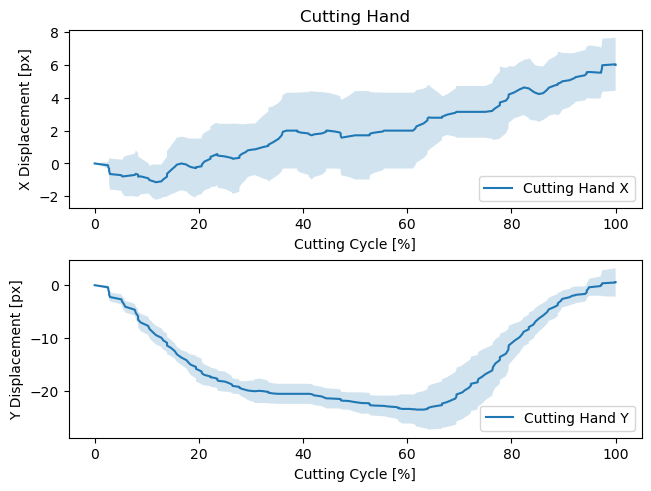

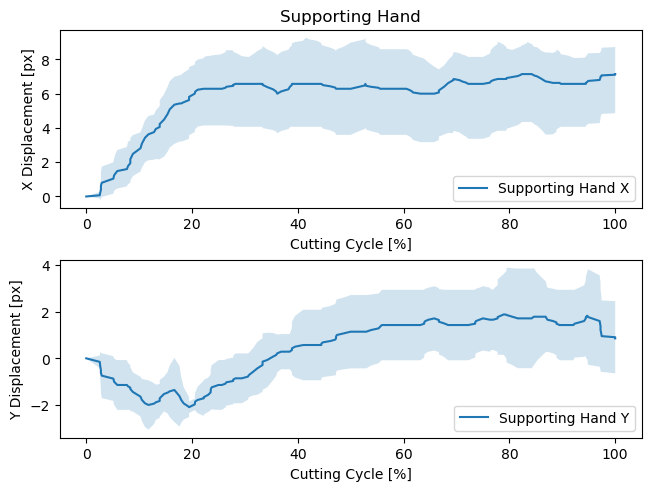

In [12]:
# 2cm
# 関係性を４つ一気に比較

# Cut X
fig, ax_cut = plt.subplots(2, 1, layout='constrained')
line_cut1 = ax_cut[0].plot(m01_new['flame'], mean_cxr, label='Cutting Hand X')
fill_cut1 = ax_cut[0].fill_between(m01_new['flame'], mean_cxr + std_cxr, mean_cxr - std_cxr, alpha=0.2)
ax_cut[0].set_xlabel('Cutting Cycle [%]')
ax_cut[0].set_ylabel('X Displacement [px]')
ax_cut[0].set_title('Cutting Hand')
ax_cut[0].legend(loc='lower right')

# Cut Y
line_cut1 = ax_cut[1].plot(m01_new['flame'], mean_cyr, label='Cutting Hand Y')
fill_cut1 = ax_cut[1].fill_between(m01_new['flame'], mean_cyr + std_cyr, mean_cyr - std_cyr, alpha=0.2)
ax_cut[1].set_xlabel('Cutting Cycle [%]')
ax_cut[1].set_ylabel('Y Displacement [px]')
ax_cut[1].legend(loc='lower right')

# Sup X
fig, ax_sup = plt.subplots(2, 1, layout='constrained')
line_sup3 = ax_sup[0].plot(m01_new['flame'], mean_sxr, label='Supporting Hand X')
fill_cut3 = ax_sup[0].fill_between(m01_new['flame'], mean_sxr + std_cxr, mean_sxr - std_sxr, alpha=0.2)
ax_sup[0].set_xlabel('Cutting Cycle [%]')
ax_sup[0].set_ylabel('X Displacement [px]')
ax_sup[0].set_title('Supporting Hand')
ax_sup[0].legend(loc='lower right')

# Sup Y
line_cut4 = ax_sup[1].plot(m01_new['flame'], mean_syr, label='Supporting Hand Y')
fill_cut4 = ax_sup[1].fill_between(m01_new['flame'], mean_syr + std_syr, mean_syr - std_syr, alpha=0.2)
ax_sup[1].set_xlabel('Cutting Cycle [%]')
ax_sup[1].set_ylabel('Y Displacement [px]')
ax_sup[1].legend(loc='lower right')

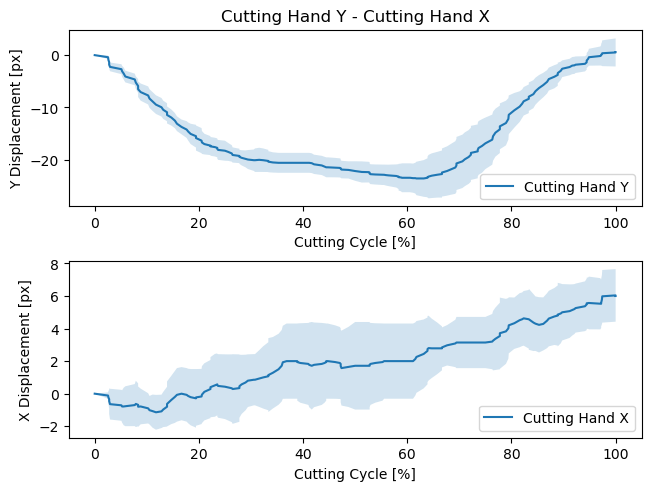

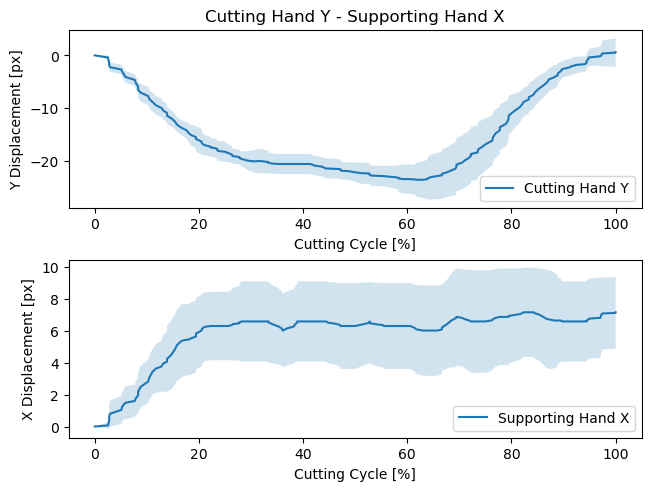

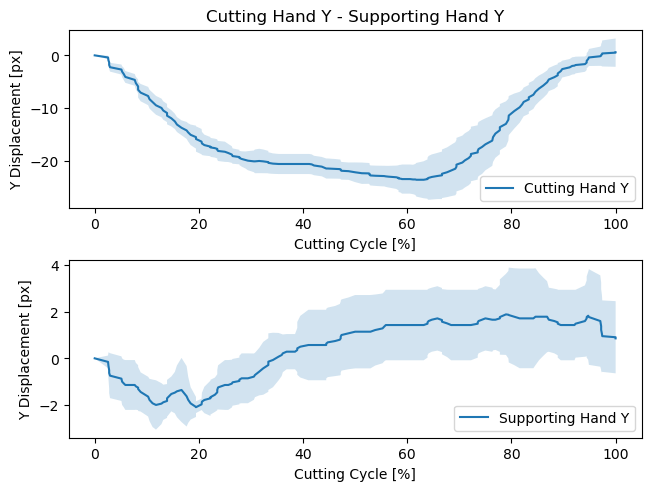

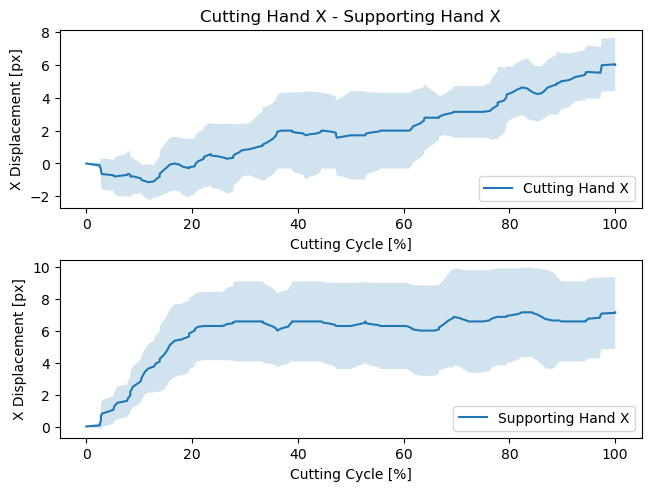

In [13]:
# 関係性をグラフで比較
# Cut Y - Cut X ---------------------------------------------------------------
fig, ax4 = plt.subplots(2, 1, layout='constrained')
line41 = ax4[0].plot(m01_new['flame'], mean_cyr, label='Cutting Hand Y')
fill41 = ax4[0].fill_between(m01_new['flame'], mean_cyr + std_cyr, mean_cyr - std_cyr, alpha=0.2)
ax4[0].set_xlabel('Cutting Cycle [%]')
ax4[0].set_ylabel('Y Displacement [px]')
ax4[0].set_title('Cutting Hand Y - Cutting Hand X')
ax4[0].legend(loc='lower right')

line42 = ax4[1].plot(m01_new['flame'], mean_cxr, label='Cutting Hand X')
fill42 = ax4[1].fill_between(m01_new['flame'], mean_cxr + std_cxr, mean_cxr - std_cxr, alpha=0.2)
ax4[1].set_xlabel('Cutting Cycle [%]')
ax4[1].set_ylabel('X Displacement [px]')
ax4[1].legend(loc='lower right')

# Cut Y - Sup X ---------------------------------------------------------------
fig, ax5 = plt.subplots(2, 1, layout='constrained')
line51 = ax5[0].plot(m01_new['flame'], mean_cyr, label='Cutting Hand Y')
fill51 = ax5[0].fill_between(m01_new['flame'], mean_cyr + std_cyr, mean_cyr - std_cyr, alpha=0.2)
ax5[0].set_xlabel('Cutting Cycle [%]')
ax5[0].set_ylabel('Y Displacement [px]')
ax5[0].set_title('Cutting Hand Y - Supporting Hand X')
ax5[0].legend(loc='lower right')

line52 = ax5[1].plot(m01_new['flame'], mean_sxr, label='Supporting Hand X')
fill52 = ax5[1].fill_between(m01_new['flame'], mean_sxr + std_sxr, mean_sxr - std_sxr, alpha=0.2)
ax5[1].set_xlabel('Cutting Cycle [%]')
ax5[1].set_ylabel('X Displacement [px]')
ax5[1].legend(loc='lower right')

# Cut Y - Sup Y ---------------------------------------------------------------
fig, ax52 = plt.subplots(2, 1, layout='constrained')
line521 = ax52[0].plot(m01_new['flame'], mean_cyr, label='Cutting Hand Y')
fill521 = ax52[0].fill_between(m01_new['flame'], mean_cyr + std_cyr, mean_cyr - std_cyr, alpha=0.2)
ax52[0].set_xlabel('Cutting Cycle [%]')
ax52[0].set_ylabel('Y Displacement [px]')
ax52[0].set_title('Cutting Hand Y - Supporting Hand Y')
ax52[0].legend(loc='lower right')

line52 = ax52[1].plot(m01_new['flame'], mean_syr, label='Supporting Hand Y')
fill52 = ax52[1].fill_between(m01_new['flame'], mean_syr + std_syr, mean_syr - std_syr, alpha=0.2)
ax52[1].set_xlabel('Cutting Cycle [%]')
ax52[1].set_ylabel('Y Displacement [px]')
ax52[1].legend(loc='lower right')

# Cut X - Sup X ---------------------------------------------------------------
fig, ax6 = plt.subplots(2, 1, layout='constrained')
line61 = ax6[0].plot(m01_new['flame'], mean_cxr, label='Cutting Hand X')
fill61 = ax6[0].fill_between(m01_new['flame'], mean_cxr + std_cxr, mean_cxr - std_cxr, alpha=0.2)
ax6[0].set_xlabel('Cutting Cycle [%]')
ax6[0].set_ylabel('X Displacement [px]')
ax6[0].set_title('Cutting Hand X - Supporting Hand X')
ax6[0].legend(loc='lower right')

line62 = ax6[1].plot(m01_new['flame'], mean_sxr, label='Supporting Hand X')
fill62 = ax6[1].fill_between(m01_new['flame'], mean_sxr + std_sxr, mean_sxr - std_sxr, alpha=0.2)
ax6[1].set_xlabel('Cutting Cycle [%]')
ax6[1].set_ylabel('X Displacement [px]')
ax6[1].legend(loc='lower right')

# # Cut X - Sup X （移動量の関係性）-------------------------
# # Cut X - Sup X ---------------------------------------------------------------
# fig, ax7 = plt.subplots()
# line71 = ax7.plot(mean_cxr, mean_sxr, label='Cutting Hand X')
# # ax4[0].set_xlabel('Cutting Cycle [%]')
# ax7.set_xlabel('Cutting X [px]')
# ax7.set_ylabel('Supporting X [px]')
# ax7.set_title('Cutting Hand X - Supporting Hand X')
# ax7.legend(loc='lower right')

In [14]:
print('-------------')
print('mean_cx max: ', mean_cxr.max())
print('mean_sx max: ', mean_sxr.max() )
print('-------------')

-------------
mean_cx max:  6.038095238095244
mean_sx max:  7.142857142857143
-------------


## bi5cm1

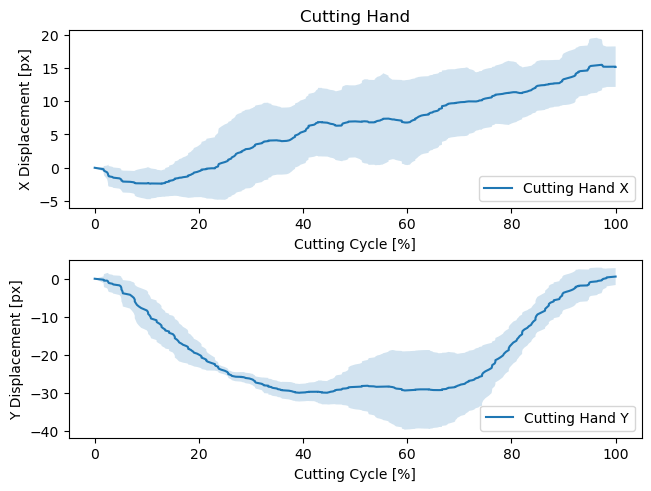

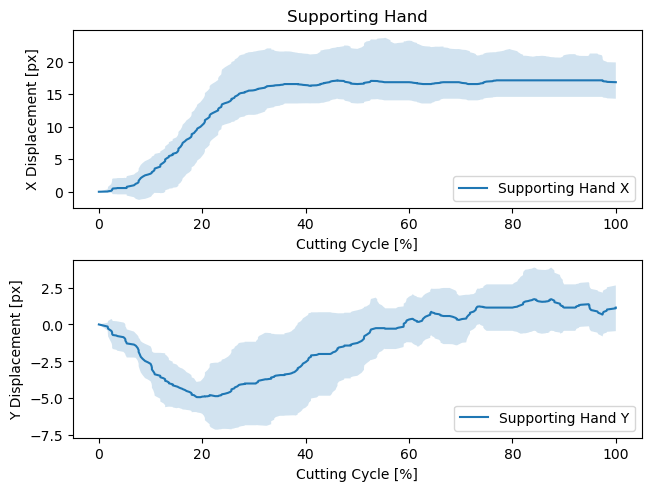

In [15]:
# 5cm
# 関係性を４つ一気に比較

# Cut X
fig, ax5_cut = plt.subplots(2, 1, layout='constrained')
line5_cut1 = ax5_cut[0].plot(m5_01new['flame'], mean5_cxr, label='Cutting Hand X')
fill5_cut1 = ax5_cut[0].fill_between(m5_01new['flame'], mean5_cxr + std5_cxr, mean5_cxr - std5_cxr, alpha=0.2)
ax5_cut[0].set_xlabel('Cutting Cycle [%]')
ax5_cut[0].set_ylabel('X Displacement [px]')
ax5_cut[0].set_title('Cutting Hand')
ax5_cut[0].legend(loc='lower right')

# Cut Y
line5_cut1 = ax5_cut[1].plot(m5_01new['flame'], mean5_cyr, label='Cutting Hand Y')
fill5_cut1 = ax5_cut[1].fill_between(m5_01new['flame'], mean5_cyr + std5_cyr, mean5_cyr - std5_cyr, alpha=0.2)
ax5_cut[1].set_xlabel('Cutting Cycle [%]')
ax5_cut[1].set_ylabel('Y Displacement [px]')
ax5_cut[1].legend(loc='lower right')

# Sup X
fig, ax5_sup = plt.subplots(2, 1, layout='constrained')
line5_sup3 = ax5_sup[0].plot(m5_01new['flame'], mean5_sxr, label='Supporting Hand X')
fill5_cut3 = ax5_sup[0].fill_between(m5_01new['flame'], mean5_sxr + std5_cxr, mean5_sxr - std5_sxr, alpha=0.2)
ax5_sup[0].set_xlabel('Cutting Cycle [%]')
ax5_sup[0].set_ylabel('X Displacement [px]')
ax5_sup[0].set_title('Supporting Hand')
ax5_sup[0].legend(loc='lower right')

# Sup Y
line5_cut4 = ax5_sup[1].plot(m5_01new['flame'], mean5_syr, label='Supporting Hand Y')
fill5_cut4 = ax5_sup[1].fill_between(m5_01new['flame'], mean5_syr + std5_syr, mean5_syr - std5_syr, alpha=0.2)
ax5_sup[1].set_xlabel('Cutting Cycle [%]')
ax5_sup[1].set_ylabel('Y Displacement [px]')
ax5_sup[1].legend(loc='lower right')

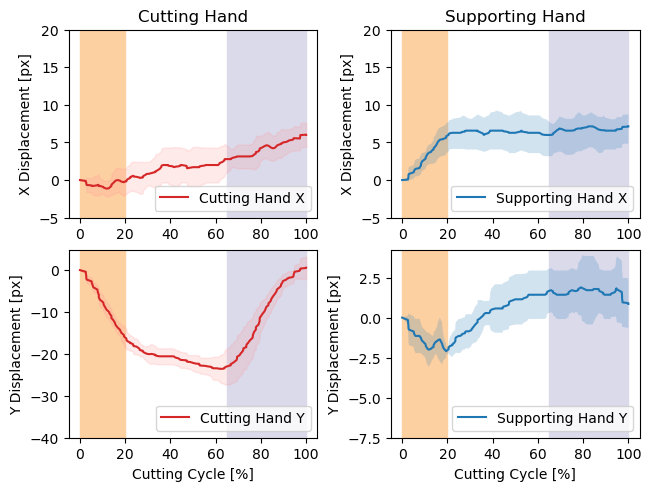

In [16]:
# 2cm
# 関係性を４つ一気に比較

# Cut X
fig, ax_cut = plt.subplots(2, 2, layout='constrained')
ax_cut[0][0].axvspan(0,20, color='#FDD0A2')
ax_cut[0][0].axvspan(65,100, color='#DADAEB')
line_cut1 = ax_cut[0][0].plot(m01_new['flame'], mean_cxr, label='Cutting Hand X', color='#D62728')
fill_cut1 = ax_cut[0][0].fill_between(m01_new['flame'], mean_cxr + std_cxr, mean_cxr - std_cxr, alpha=0.2, color='#FF9896')
# ax_cut[0][0].set_xlabel('Cutting Cycle [%]')
ax_cut[0][0].set_ylabel('X Displacement [px]')
ax_cut[0][0].set_title('Cutting Hand')
ax_cut[0][0].legend(loc='lower right')
ax_cut[0][0].set_xticks([0, 20, 40, 60, 80, 100]) 
ax_cut[0][0].set_yticks([-5, 0, 5, 10, 15, 20]) 

# Cut Y
ax_cut[1][0].axvspan(0,20, color='#FDD0A2')
ax_cut[1][0].axvspan(65,100, color='#DADAEB')
line_cut1 = ax_cut[1][0].plot(m01_new['flame'], mean_cyr,label='Cutting Hand Y', color='#D62728')
fill_cut1 = ax_cut[1][0].fill_between(m01_new['flame'], mean_cyr + std_cyr, mean_cyr - std_cyr, alpha=0.2, color='#FF9896')
ax_cut[1][0].set_xlabel('Cutting Cycle [%]')
ax_cut[1][0].set_ylabel('Y Displacement [px]')
ax_cut[1][0].legend(loc='lower right')
ax_cut[1][0].set_xticks([0, 20, 40, 60, 80, 100]) 
ax_cut[1][0].set_yticks([-40, -30, -20, -10, 0]) 

# Sup X
ax_cut[0][1].axvspan(0,20, color='#FDD0A2')
ax_cut[0][1].axvspan(65,100, color='#DADAEB')
line_sup3 = ax_cut[0][1].plot(m01_new['flame'], mean_sxr, label='Supporting Hand X')
fill_cut3 = ax_cut[0][1].fill_between(m01_new['flame'], mean_sxr + std_cxr, mean_sxr - std_sxr, alpha=0.2)
# ax_cut[0][1].set_xlabel('Cutting Cycle [%]')
ax_cut[0][1].set_ylabel('X Displacement [px]')
ax_cut[0][1].set_title('Supporting Hand')
ax_cut[0][1].legend(loc='lower right')
ax_cut[0][1].set_xticks([0, 20, 40, 60, 80, 100]) 
ax_cut[0][1].set_yticks([-5, 0, 5, 10, 15, 20]) 

# Sup Y
ax_cut[1][1].axvspan(0,20, color='#FDD0A2')
ax_cut[1][1].axvspan(65,100, color='#DADAEB')
line_cut4 = ax_cut[1][1].plot(m01_new['flame'], mean_syr, label='Supporting Hand Y')
fill_cut4 = ax_cut[1][1].fill_between(m01_new['flame'], mean_syr + std_syr, mean_syr - std_syr, alpha=0.2)
ax_cut[1][1].set_xlabel('Cutting Cycle [%]')
ax_cut[1][1].set_ylabel('Y Displacement [px]')
ax_cut[1][1].legend(loc='lower right')
ax_cut[1][1].set_xticks([0, 20, 40, 60, 80, 100]) 
ax_cut[1][1].set_yticks([-7.5, -5.0, -2.5, -0.0, 2.5]) 

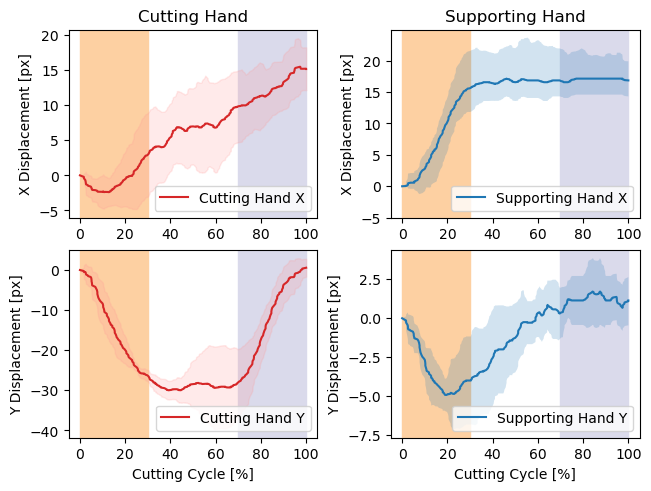

In [17]:
# 5cm
# 関係性を４つ一気に比較

# Cut X
fig, ax5_cut = plt.subplots(2, 2, layout='constrained')
ax5_cut[0][0].axvspan(0,30, color='#FDD0A2')
ax5_cut[0][0].axvspan(70,100, color='#DADAEB')
line5_cut1 = ax5_cut[0][0].plot(m5_01new['flame'], mean5_cxr, label='Cutting Hand X', color='#D62728')
fill5_cut1 = ax5_cut[0][0].fill_between(m5_01new['flame'], mean5_cxr + std5_cxr, mean5_cxr - std5_cxr, alpha=0.2, color='#FF9896')
# ax5_cut[0][0].set_xlabel('Cutting Cycle [%]')
ax5_cut[0][0].set_ylabel('X Displacement [px]')
ax5_cut[0][0].set_title('Cutting Hand')
ax5_cut[0][0].legend(loc='lower right')
ax5_cut[0][0].set_xticks([0, 20, 40, 60, 80, 100]) 

# Cut Y
ax5_cut[1][0].axvspan(0,30, color='#FDD0A2')
ax5_cut[1][0].axvspan(70,100, color='#DADAEB')
line5_cut1 = ax5_cut[1][0].plot(m5_01new['flame'], mean5_cyr, label='Cutting Hand Y', color='#D62728')
fill5_cut1 = ax5_cut[1][0].fill_between(m5_01new['flame'], mean5_cyr + std5_cyr, mean5_cyr - std5_cyr, alpha=0.2, color='#FF9896')
ax5_cut[1][0].set_xlabel('Cutting Cycle [%]')
ax5_cut[1][0].set_ylabel('Y Displacement [px]')
ax5_cut[1][0].legend(loc='lower right')
ax5_cut[1][0].set_xticks([0, 20, 40, 60, 80, 100]) 

# Sup X
ax5_cut[0][1].axvspan(0,30, color='#FDD0A2')
ax5_cut[0][1].axvspan(70,100, color='#DADAEB')
line5_sup3 = ax5_cut[0][1].plot(m5_01new['flame'], mean5_sxr, label='Supporting Hand X')
fill5_cut3 = ax5_cut[0][1].fill_between(m5_01new['flame'], mean5_sxr + std5_cxr, mean5_sxr - std5_sxr, alpha=0.2)
# ax5_cut[0][1].set_xlabel('Cutting Cycle [%]')
ax5_cut[0][1].set_ylabel('X Displacement [px]')
ax5_cut[0][1].set_title('Supporting Hand')
ax5_cut[0][1].legend(loc='lower right')
ax5_cut[0][1].set_xticks([0, 20, 40, 60, 80, 100]) 
ax5_cut[0][1].set_yticks([-5, 0, 5, 10, 15, 20])

# Sup Y
ax5_cut[1][1].axvspan(0,30, color='#FDD0A2')
ax5_cut[1][1].axvspan(70,100, color='#DADAEB')
line5_cut4 = ax5_cut[1][1].plot(m5_01new['flame'], mean5_syr, label='Supporting Hand Y')
fill5_cut4 = ax5_cut[1][1].fill_between(m5_01new['flame'], mean5_syr + std5_syr, mean5_syr - std5_syr, alpha=0.2)
ax5_cut[1][1].set_xlabel('Cutting Cycle [%]')
ax5_cut[1][1].set_ylabel('Y Displacement [px]')
ax5_cut[1][1].legend(loc='lower right')
ax5_cut[1][1].set_xticks([0, 20, 40, 60, 80, 100]) 

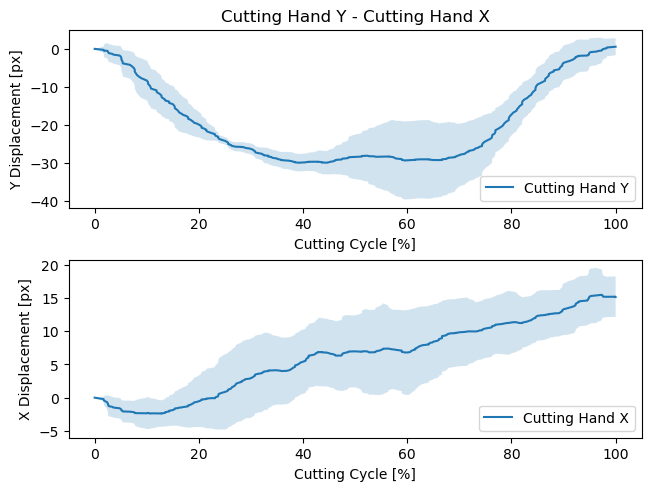

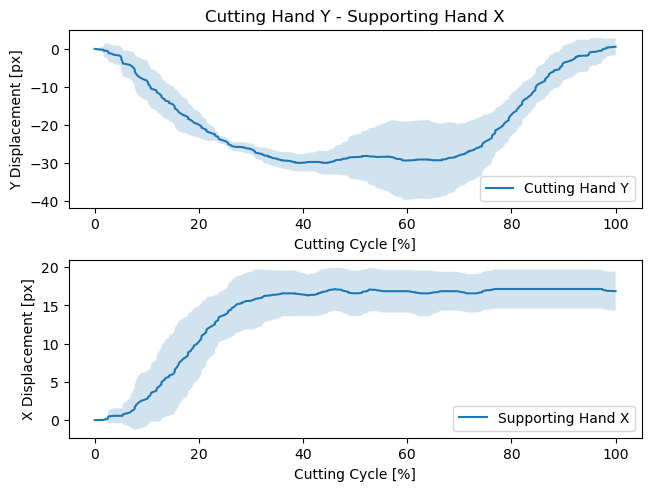

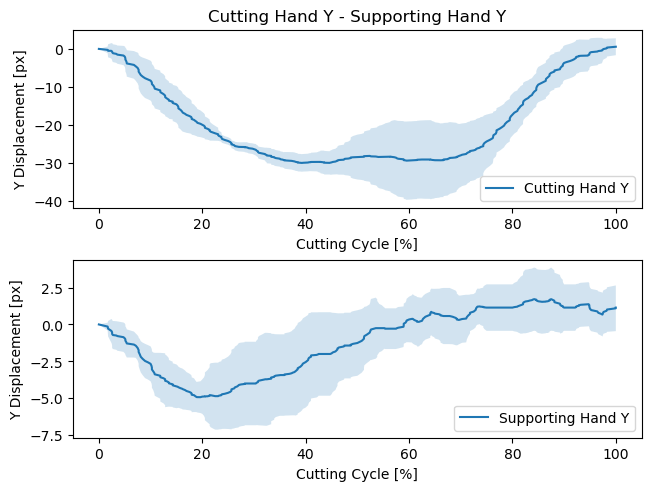

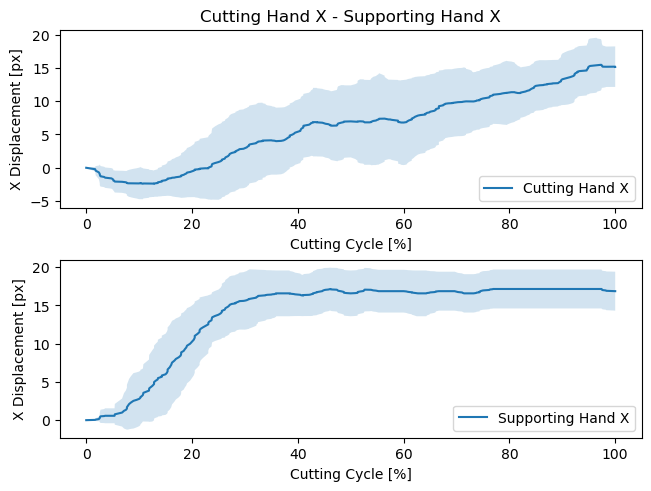

In [18]:
# 関係性をグラフで比較
# Cut Y - Cut X ---------------------------------------------------------------
fig, ax5_4 = plt.subplots(2, 1, layout='constrained')
line5_41 = ax5_4[0].plot(m5_01new['flame'], mean5_cyr, label='Cutting Hand Y')
fill5_41 = ax5_4[0].fill_between(m5_01new['flame'], mean5_cyr + std5_cyr, mean5_cyr - std5_cyr, alpha=0.2)
ax5_4[0].set_xlabel('Cutting Cycle [%]')
ax5_4[0].set_ylabel('Y Displacement [px]')
ax5_4[0].set_title('Cutting Hand Y - Cutting Hand X')
ax5_4[0].legend(loc='lower right')

line5_42 = ax5_4[1].plot(m5_01new['flame'], mean5_cxr, label='Cutting Hand X')
fill5_42 = ax5_4[1].fill_between(m5_01new['flame'], mean5_cxr + std5_cxr, mean5_cxr - std5_cxr, alpha=0.2)
ax5_4[1].set_xlabel('Cutting Cycle [%]')
ax5_4[1].set_ylabel('X Displacement [px]')
ax5_4[1].legend(loc='lower right')

# Cut Y - Sup X ---------------------------------------------------------------
fig, ax5_5 = plt.subplots(2, 1, layout='constrained')
line5_51 = ax5_5[0].plot(m5_01new['flame'], mean5_cyr, label='Cutting Hand Y')
fill5_51 = ax5_5[0].fill_between(m5_01new['flame'], mean5_cyr + std5_cyr, mean5_cyr - std5_cyr, alpha=0.2)
ax5_5[0].set_xlabel('Cutting Cycle [%]')
ax5_5[0].set_ylabel('Y Displacement [px]')
ax5_5[0].set_title('Cutting Hand Y - Supporting Hand X')
ax5_5[0].legend(loc='lower right')

line5_52 = ax5_5[1].plot(m5_01new['flame'], mean5_sxr, label='Supporting Hand X')
fill5_52 = ax5_5[1].fill_between(m5_01new['flame'], mean5_sxr + std5_sxr, mean5_sxr - std5_sxr, alpha=0.2)
ax5_5[1].set_xlabel('Cutting Cycle [%]')
ax5_5[1].set_ylabel('X Displacement [px]')
ax5_5[1].legend(loc='lower right')

# Cut Y - Sup Y ---------------------------------------------------------------
fig, ax5_52 = plt.subplots(2, 1, layout='constrained')
line5_521 = ax5_52[0].plot(m5_01new['flame'], mean5_cyr, label='Cutting Hand Y')
fill5_521 = ax5_52[0].fill_between(m5_01new['flame'], mean5_cyr + std5_cyr, mean5_cyr - std5_cyr, alpha=0.2)
ax5_52[0].set_xlabel('Cutting Cycle [%]')
ax5_52[0].set_ylabel('Y Displacement [px]')
ax5_52[0].set_title('Cutting Hand Y - Supporting Hand Y')
ax5_52[0].legend(loc='lower right')

line5_52 = ax5_52[1].plot(m5_01new['flame'], mean5_syr, label='Supporting Hand Y')
fill5_52 = ax5_52[1].fill_between(m5_01new['flame'], mean5_syr + std5_syr, mean5_syr - std5_syr, alpha=0.2)
ax5_52[1].set_xlabel('Cutting Cycle [%]')
ax5_52[1].set_ylabel('Y Displacement [px]')
ax5_52[1].legend(loc='lower right')

# Cut X - Sup X ---------------------------------------------------------------
fig, ax5_6 = plt.subplots(2, 1, layout='constrained')
line5_61 = ax5_6[0].plot(m5_01new['flame'], mean5_cxr, label='Cutting Hand X')
fill5_61 = ax5_6[0].fill_between(m5_01new['flame'], mean5_cxr + std5_cxr, mean5_cxr - std5_cxr, alpha=0.2)
ax5_6[0].set_xlabel('Cutting Cycle [%]')
ax5_6[0].set_ylabel('X Displacement [px]')
ax5_6[0].set_title('Cutting Hand X - Supporting Hand X')
ax5_6[0].legend(loc='lower right')

line5_62 = ax5_6[1].plot(m5_01new['flame'], mean5_sxr, label='Supporting Hand X')
fill5_62 = ax5_6[1].fill_between(m5_01new['flame'], mean5_sxr + std5_sxr, mean5_sxr - std5_sxr, alpha=0.2)
ax5_6[1].set_xlabel('Cutting Cycle [%]')
ax5_6[1].set_ylabel('X Displacement [px]')
ax5_6[1].legend(loc='lower right')

In [19]:
## print('-------------')
print('mean5_cx max: ', mean5_cxr.max())
print('mean5_sx max: ', mean5_sxr.max() )
print('-------------')

# sample数はいくら？
print(mean_cxr.size) # 2cm幅
print(mean5_cxr.size) # 5cm幅

mean5_cx max:  15.468253968253967
mean5_sx max:  17.142857142857142
-------------
165
328
